# MNIST Dataset

### Code by: Professor Birsen Sirkeci
#### Modified by: Shifa Shaikh

Here we are importing all the libraries used in the model. 

In [ ]:
#pip install tensorflow

In [ ]:
from sklearn.datasets import fetch_openml #Getting the dataset

import tensorflow as tf #tensorflow layers

import numpy as np #for mathematics

import matplotlib.pyplot as plt #plotting the graphs
%matplotlib inline

from datetime import datetime

from sklearn import metrics #model evaluation MSE, Score etc
from sklearn.metrics import accuracy_score #to measure the accuracy of the model
from sklearn.metrics import classification_report #to build a report of classification with metrics and accuracy
from sklearn.metrics import confusion_matrix #build a confusion matrix

from sklearn.preprocessing import StandardScaler #scaling
from sklearn.model_selection import train_test_split #splitting the dataset
from sklearn.model_selection import cross_val_score #validation accuracy
from sklearn.model_selection import cross_val_predict #estimate cross validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV #search over specified parameter values for an estimator


In [ ]:
#from sklearn.datasets import fetch_mldata
#mnist_dataset = fetch_mldata('MNIST original')
#print(type(mnist_dataset), mnist_dataset)

## FOR YOUR PROJECT, YOU CAN NOT USE fetch_openml, you need to write a code to read the files into a dataframe
## You can check the KAGGLE-site for some sample implementations

mnist_dataset = fetch_openml('mnist_784') # loading the dataset in mnist_dataset
print(type(mnist_dataset))

<class 'sklearn.utils.Bunch'>


In [ ]:
X = mnist_dataset['data'] #taking X as input
print('X', type(X), X.shape)

X <class 'numpy.ndarray'> (70000, 784)


###  A different digit

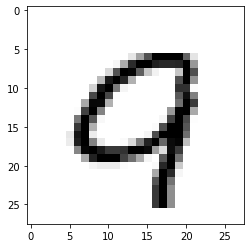

In [ ]:
plt.imshow(X[3000].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest') #plt.axis("off")
plt.show() #plotting first picture from the dataset

In [ ]:
y = mnist_dataset['target'] #getting y as output
print('y', type(y), y.shape)
print('split to train', y[:59999]) #0-59999 train
print('split to test', y[60000:]) #60000-70000 test

y <class 'numpy.ndarray'> (70000,)
split to train ['5' '0' '4' ... '3' '5' '6']
split to test ['7' '2' '1' ... '4' '5' '6']


In [ ]:
X_train, X_test = X[:60000], X[60000:] #splitting X into train and test
print('X_train', type(X_train), X_train.shape)
print('X_test', type(X_test), X_test.shape)

X_train <class 'numpy.ndarray'> (60000, 784)
X_test <class 'numpy.ndarray'> (10000, 784)


In [ ]:
y_train, y_test = y[:60000], y[60000:]
print('y_train', type(y_train), y_train.shape)
print('y_test', type(y_test), y_test.shape)

y_train <class 'numpy.ndarray'> (60000,)
y_test <class 'numpy.ndarray'> (10000,)


In [ ]:
digit_train, counts_train = np.unique(y_train, return_counts = True)

distribution_train = dict(zip(digit_train, counts_train)) #to check the numbler of datapoints for each digit in y train
print(distribution_train )

{'0': 5923, '1': 6742, '2': 5958, '3': 6131, '4': 5842, '5': 5421, '6': 5918, '7': 6265, '8': 5851, '9': 5949}


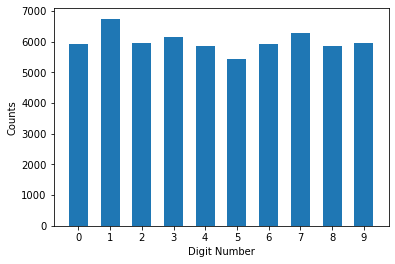

In [ ]:
plt.bar(list(distribution_train.keys()),distribution_train.values(),width =0.6)
plt.xlabel('Digit Number') #bar graph for checking the distribution 
plt.ylabel('Counts')
plt.show()

In [ ]:
digit_test, counts_test = np.unique(y_test, return_counts = True) #y test

distribution_test = dict(zip(digit_test, counts_test))
print(distribution_test)

{'0': 980, '1': 1135, '2': 1032, '3': 1010, '4': 982, '5': 892, '6': 958, '7': 1028, '8': 974, '9': 1009}


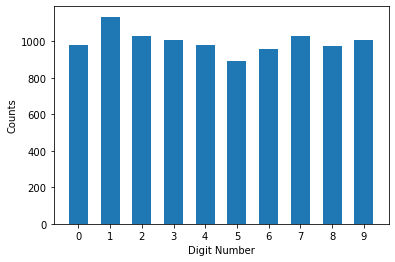

In [ ]:
plt.bar(list(distribution_test.keys()),distribution_test.values(),width =0.6)
plt.xlabel('Digit Number')  #counting the number of test values for each class
plt.ylabel('Counts')
plt.show()

In [ ]:
scaler = StandardScaler() #for scaling or normalizing the images
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

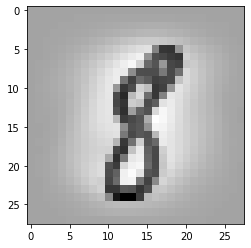

In [ ]:
plt.imshow(X_train[300].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest') #plt.axis("off")
plt.imshow(X_train_scaled[300].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest') #Plot or display the scaled data
plt.show()

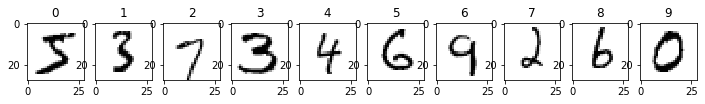

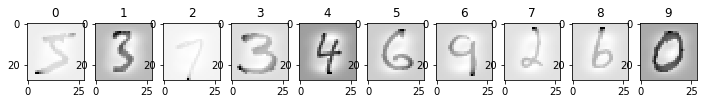

In [ ]:
fig_object, ax_object = plt.subplots(1, 10, figsize=(12,5))
ax_object = ax_object.reshape(10,)
      
for i in range(len(ax_object)):
    ax = ax_object[i]
    ax.imshow(X_train[6500*i].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest')
    ax.set_title(i)       #display original images
plt.show()

fig_object, ax_object = plt.subplots(1, 10, figsize=(12,5))
ax_object = ax_object.reshape(10,)
      
for i in range(len(ax_object)):
    ax = ax_object[i]               #display normalized images
    ax.imshow(X_train_scaled[6500*i].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest')
    ax.set_title(i)       
plt.show()

In [ ]:
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.1666, random_state = 42)
print(X_train.shape, X_val.shape)
print(y_train, y_val)     #For cross validation we split into train and validation sets from train set

(50004, 784) (9996, 784)
['5' '9' '8' ... '0' '0' '4'] ['7' '3' '8' ... '3' '0' '4']


In [ ]:
import tensorflow as tf
from tensorflow import keras      #checking the versions of tensorflow and keras
print("Tensorflow Version:", tf.__version__)
print("Keras Version:", keras.__version__)


Tensorflow Version: 2.3.1
Keras Version: 2.4.0


In [ ]:
## READ "Implementing MLPs with Keras" on Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow 
#(pages 295-308)
from tensorflow.keras.optimizers import SGD #Stochastic Gradient Descent

model = keras. models.Sequential()   #Neural Network
model.add(keras.layers.Dense(300, activation ="sigmoid"))
model.add(keras.layers.Dense(300, activation ="sigmoid"))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))


sgd = SGD(learning_rate=0.001)  #setting the learning rate
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) #defining optimizer, loss, accuracy 

X_train = X_train.astype('float32')/255.0
y_train = y_train.astype('uint')
X_val = X_val.astype('float32')/255.0
y_val = y_val.astype('uint')

model.fit(X_train, y_train, batch_size=128, epochs=15, validation_data =(X_val,y_val)) #Train the model using train set and validate the accuracy using validation set


Epoch 1/15
391/391 [==============================] - 4s 9ms/step - loss: 2.3078 - accuracy: 0.1241 - val_loss: 2.2929 - val_accuracy: 0.1092
Epoch 2/15
391/391 [==============================] - 3s 9ms/step - loss: 2.2904 - accuracy: 0.1144 - val_loss: 2.2898 - val_accuracy: 0.1095
Epoch 3/15
391/391 [==============================] - 3s 9ms/step - loss: 2.2874 - accuracy: 0.1152 - val_loss: 2.2869 - val_accuracy: 0.1092
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 2.2843 - accuracy: 0.1160 - val_loss: 2.2836 - val_accuracy: 0.1238
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 2.2810 - accuracy: 0.1227 - val_loss: 2.2803 - val_accuracy: 0.1195
Epoch 6/15
391/391 [==============================] - 3s 9ms/step - loss: 2.2778 - accuracy: 0.1318 - val_loss: 2.2771 - val_accuracy: 0.1174
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 2.2746 - accuracy: 0.1329 - val_loss: 2.2739 - val_accuracy: 0.1233
Epoch 

In [ ]:
X_test = X_test.astype('float32')/255.0
y_test = y_test.astype('uint')


loss, acc = model.evaluate(X_test, y_test, verbose=0) #Test the model
print('Accuracy: %.3f' % acc)
     

Accuracy: 0.279


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

#getting the models performance based on confusion metrics and classification reports

y_proba = model.predict(X_test) 
y_pred = model.predict_classes(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_pred, y_test))
print('Classification Report')
print(classification_report(y_pred, y_test))


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Confusion Matrix
[[ 658    0   33    4    4   20   20    1   18    8]
 [ 277 1135  953  777  588  715  833  324  823  407]
 [   0    0   18    0    0    0    2    0    2    1]
 [   0    0    1  185   15   56    0    0   35    4]
 [   0    0    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    6    0   94    0    0    0]
 [  45    0   27   44  368  101    9  703   96  589]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.86      0.

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Seeing the test accuracy for the previous model was better than this model. We are increasing the layers in the model and making it more complicated than the professor's model. 